# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
import numpy as np
network_path = os.path.join("..", "networks", "sten_5_SPN_FS_LTS")
network_file = os.path.join(network_path, "network-synapses.hdf5")
simulation_file_with_synapses = os.path.join(network_path, "simulation", "output-with-synapses-sten_5A.hdf5")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses-sten_5A.hdf5")
duration = 18

# Local path for Snudda data
snudda_data = "/home/hjorth/HBP/BasalGangliaData/data"

# Plot network

In this particular example with SPN, FS and LTS we do not use the population units.

Population unit 0 has 31998 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons
Population unit 0 has 31998 neurons
Population unit 1 has 4000 neurons
Population unit 2 has 4000 neurons


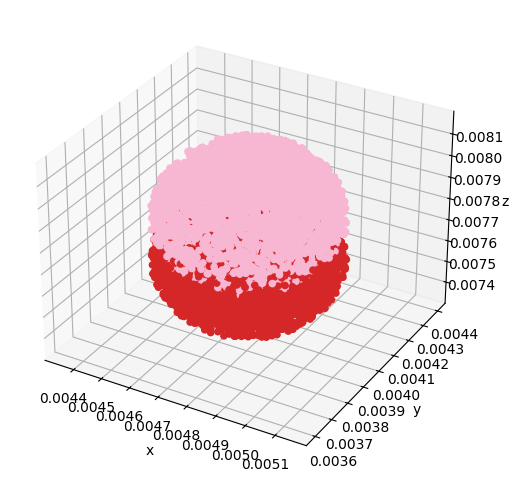

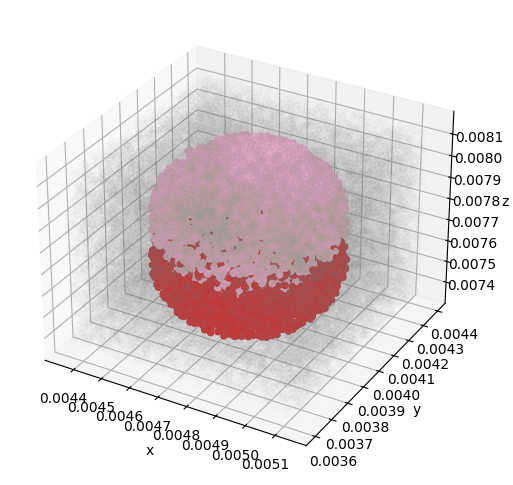

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path, snudda_data=snudda_data)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

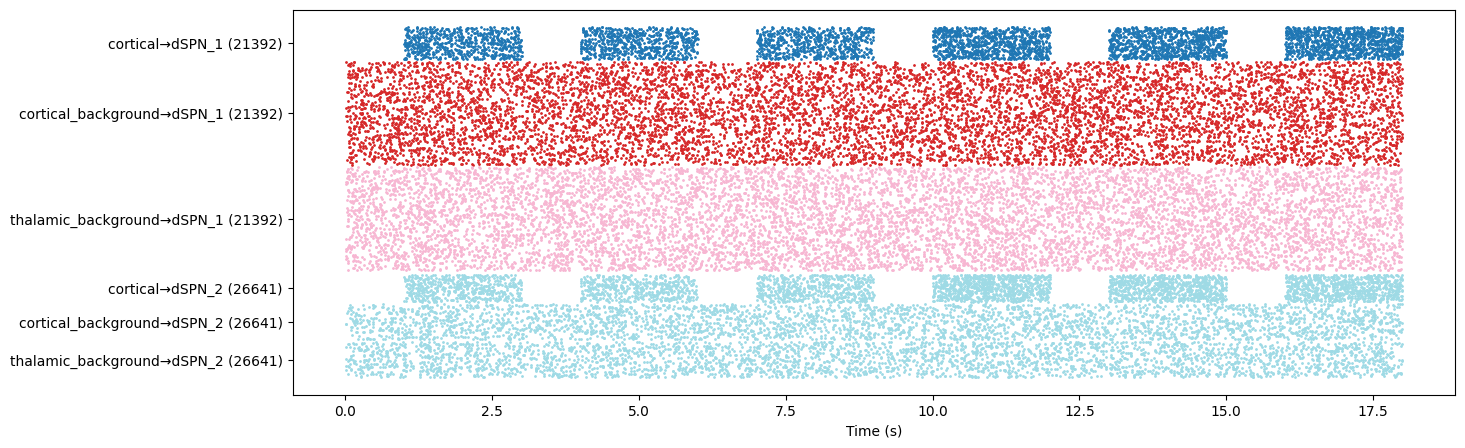

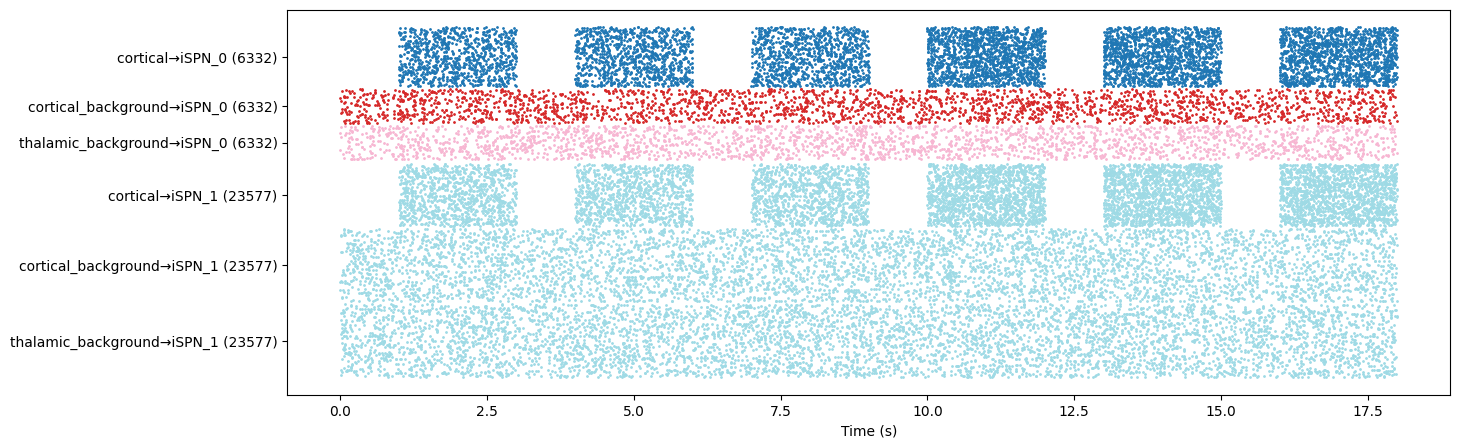

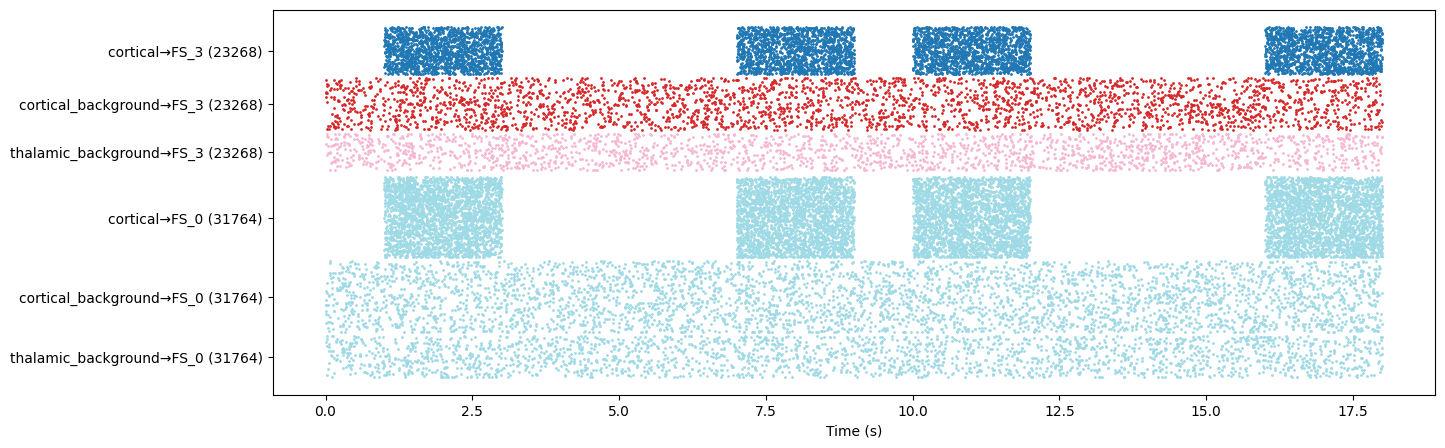

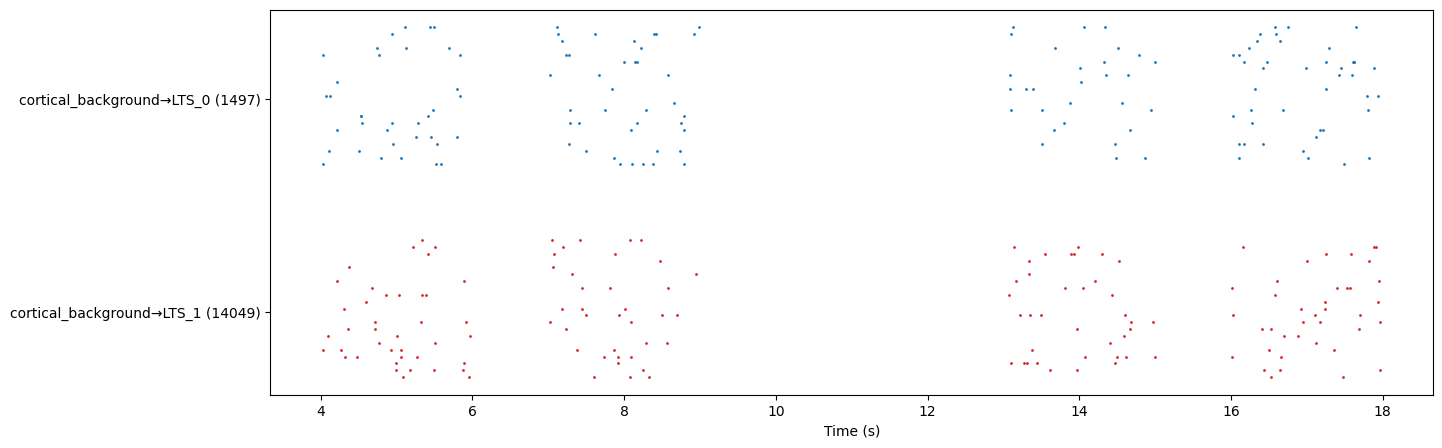

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")

spi = PlotInput(input_file, network_file)

spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="FS", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=0, num_neurons=2, neuron_type="LTS", fig_size=(15,5))

# spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
# spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

# spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
# spi.plot_input_population_unit(population_unit_id=2, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

In [4]:
# Cleanup
pn = None
spi = None

# Plot neuron activity

## With lateral inhibtion

In [5]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_with_synapses)# 

# spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_5_SPN_FS_LTS/simulation/output-with-synapses-sten_5A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
26: (dSPN_0, pb0529fb9, m37886c78)
238: (LTS_0, p94d54b1c, m803558b5)
240: (LTS_1, pbae91695, ma4dacccf)
256: (dSPN_0, p7517a0e9, m9fda9b20)
257: (dSPN_0, p7aa400d6, m9fda9b20)
283: (dSPN_0, p7aa400d6, mc710c1a4)
573: (LTS_1, pe675a3d7, m872fbb26)
574: (LTS_1, p54dfea77, m8ded5e00)
580: (dSPN_0, p7aa400d6, m22be6817)
878: (dSPN_0, pb0529fb9, m9fda9b20)
1125: (LTS_1, p3f21fd29, mf4ba6a4e)
1130: (dSPN_0, p7aa400d6, mc710c1a4)
1135: (dSPN_0, p8bf90d1f, m9fda9b20)
1143: (dSPN_0, p1863c9a5, m37886c78)
1162: (dSPN_0, p7aa400d6, m9fda9b20)
1497: (LTS_0, p1886c37b, m803558b5)
1498: (LTS_1, p8b1585a0, mf4ba6a4e)
1499: (LTS_1, pb823efb9, mda52699c)
1521: (dSPN_0, p1863c9a5, mc710c1a4)
1524: (dSPN_0, pb0529fb9, mbb8e5b24)
1805: (LTS_0, p1fd33c8c, m803558b5)
1848: (dSPN_0, p7aa400d6, m22be6817)
2111: (LTS_0, p1886c37b, m80355

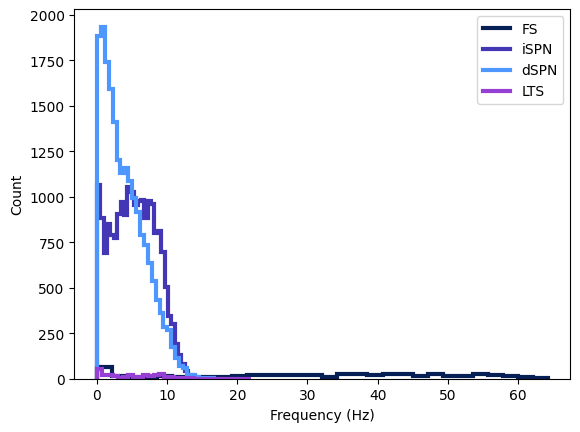

In [6]:
spr.plot_firing_frequency_distribution(bins=30)

spr.plot_spike_histogram(label_text="lateral inhibition pop_id=")

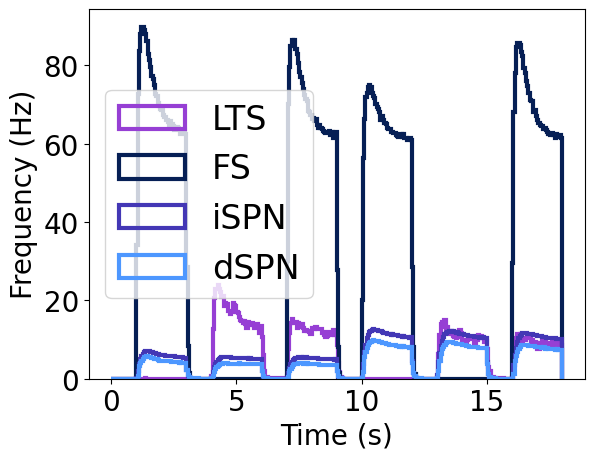

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [7]:
spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS", "LTS"])

## Without lateral inhibition

In [8]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, network_file=network_file, simulation_file=simulation_file_no_synapses)

# spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Loading ../networks/sten_5_SPN_FS_LTS/simulation/output-no-synapses-sten_5A.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
225: (iSPN_3, p57956f10, m1083058d)
238: (LTS_0, p94d54b1c, m803558b5)
240: (LTS_1, pbae91695, ma4dacccf)
253: (dSPN_0, p1863c9a5, m22be6817)
573: (LTS_1, pe675a3d7, m872fbb26)
574: (LTS_1, p54dfea77, m8ded5e00)
578: (FS_3, p92705ff4, m15ae4048)
618: (dSPN_0, p7aa400d6, mf702205f)
1125: (LTS_1, p3f21fd29, mf4ba6a4e)
1148: (dSPN_0, p7aa400d6, mf702205f)
1497: (LTS_0, p1886c37b, m803558b5)
1498: (LTS_1, p8b1585a0, mf4ba6a4e)
1499: (LTS_1, pb823efb9, mda52699c)
1517: (dSPN_0, p7aa400d6, mf702205f)
1540: (dSPN_0, p1863c9a5, m22be6817)
1805: (LTS_0, p1fd33c8c, m803558b5)
1847: (dSPN_0, p1863c9a5, m22be6817)
2111: (LTS_0, p1886c37b, m803558b5)
2113: (LTS_1, p266c7fb8, mf4ba6a4e)
2114: (LTS_1, p881c7f54, m8ded5e00)
2392: (dSPN_0, p1863c9a5, m37886c78)
2415: (dSPN_0, p1863c9a5, mc710c1a4)
2486: (dSPN_2, p185b99a1, mdf60297d

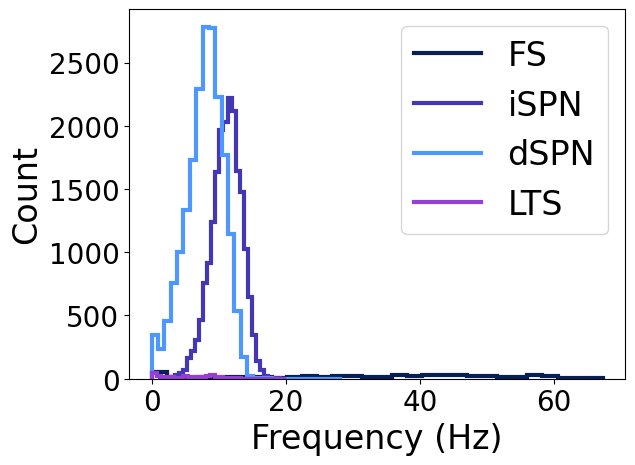

In [9]:
spr_no.plot_firing_frequency_distribution(bins=30)

spr_no.plot_spike_histogram(label_text="no inhibition pop_id=")

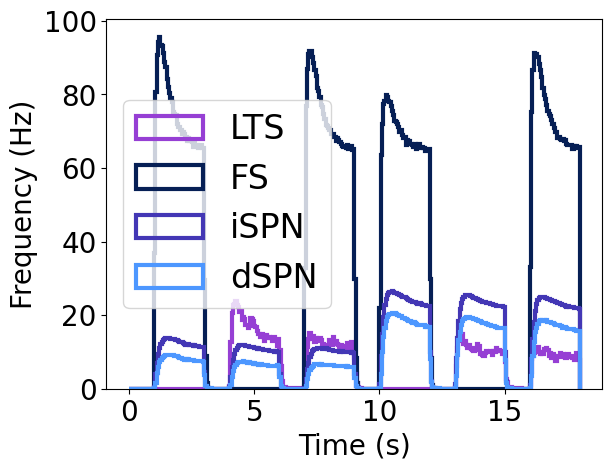

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [10]:
spr_no.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS", "LTS"])

# Summarising difference in activity (with and without lateral inhibition)

Writing figure ../networks/sten_5_SPN_FS_LTS/figures/spike-histogram-SPN-FS-LTS


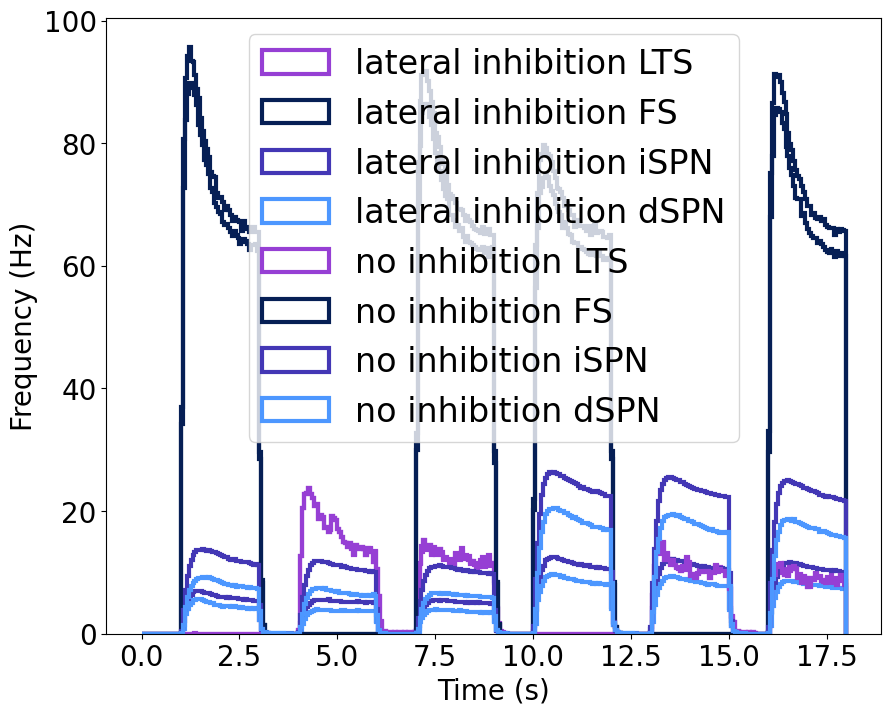

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [11]:
ax = spr.plot_spike_histogram_type(neuron_type=["dSPN", "iSPN", "FS", "LTS"], label_text="lateral inhibition ", show_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram_type(ax=ax, neuron_type=["dSPN", "iSPN", "FS", "LTS"], label_text="no inhibition ", show_figure=True, fig_file="spike-histogram-SPN-FS-LTS")

In [12]:
time_ranges = [(2,3), (5,6), (8,9), (11,12), (14,15), (17,18)]

dspn_id = spr.snudda_load.get_neuron_id_of_type("dSPN")
ispn_id = spr.snudda_load.get_neuron_id_of_type("iSPN")
fs_id = spr.snudda_load.get_neuron_id_of_type("FS")
lts_id = spr.snudda_load.get_neuron_id_of_type("LTS")


with_lat_freq_table_dspn = spr.snudda_simulation_load.get_frequency(neuron_id=dspn_id, time_ranges=time_ranges)
with_lat_freq_table_ispn = spr.snudda_simulation_load.get_frequency(neuron_id=ispn_id, time_ranges=time_ranges)
with_lat_freq_table_fs = spr.snudda_simulation_load.get_frequency(neuron_id=fs_id, time_ranges=time_ranges)
with_lat_freq_table_lts = spr.snudda_simulation_load.get_frequency(neuron_id=lts_id, time_ranges=time_ranges)

no_lat_freq_table_dspn = spr_no.snudda_simulation_load.get_frequency(neuron_id=dspn_id, time_ranges=time_ranges)
no_lat_freq_table_ispn = spr_no.snudda_simulation_load.get_frequency(neuron_id=ispn_id, time_ranges=time_ranges)
no_lat_freq_table_fs = spr_no.snudda_simulation_load.get_frequency(neuron_id=fs_id, time_ranges=time_ranges)
no_lat_freq_table_lts = spr_no.snudda_simulation_load.get_frequency(neuron_id=lts_id, time_ranges=time_ranges)


In [14]:
with_lat_freq_dspn_mean = np.mean(with_lat_freq_table_dspn, axis=0)
with_lat_freq_ispn_mean = np.mean(with_lat_freq_table_ispn, axis=0)
with_lat_freq_fs_mean = np.mean(with_lat_freq_table_fs, axis=0)
with_lat_freq_lts_mean = np.mean(with_lat_freq_table_lts, axis=0)

no_lat_freq_dspn_mean = np.mean(no_lat_freq_table_dspn, axis=0)
no_lat_freq_ispn_mean = np.mean(no_lat_freq_table_ispn, axis=0)
no_lat_freq_fs_mean = np.mean(no_lat_freq_table_fs, axis=0)
no_lat_freq_lts_mean = np.mean(no_lat_freq_table_lts, axis=0)

n_dspn_cells = with_lat_freq_table_dspn.shape[0]
n_ispn_cells = with_lat_freq_table_ispn.shape[0]
n_fs_cells = with_lat_freq_table_fs.shape[0]
n_lts_cells = with_lat_freq_table_lts.shape[0]


# Standard error of the mean
with_lat_freq_dspn_std = np.std(with_lat_freq_table_dspn, axis=0) / np.sqrt(n_dspn_cells)
with_lat_freq_ispn_std = np.std(with_lat_freq_table_ispn, axis=0) / np.sqrt(n_ispn_cells)
with_lat_freq_fs_std = np.std(with_lat_freq_table_fs, axis=0) / np.sqrt(n_fs_cells)
with_lat_freq_lts_std = np.std(with_lat_freq_table_lts, axis=0) / np.sqrt(n_lts_cells)

no_lat_freq_dspn_std = np.std(no_lat_freq_table_dspn, axis=0) / np.sqrt(n_dspn_cells)
no_lat_freq_ispn_std = np.std(no_lat_freq_table_ispn, axis=0) / np.sqrt(n_ispn_cells)
no_lat_freq_fs_std = np.std(no_lat_freq_table_fs, axis=0) / np.sqrt(n_fs_cells)
no_lat_freq_lts_std = np.std(no_lat_freq_table_lts, axis=0) / np.sqrt(n_lts_cells)


In [23]:
print("With lateral inhibition")
for freq_dspn_mean, freq_dspn_std, freq_ispn_mean, freq_ispn_std, freq_fs_mean, freq_fs_std, freq_lts_mean, freq_lts_std in zip(with_lat_freq_dspn_mean, with_lat_freq_dspn_std, with_lat_freq_ispn_mean,with_lat_freq_ispn_std,with_lat_freq_fs_mean,with_lat_freq_fs_std, with_lat_freq_lts_mean, with_lat_freq_lts_std):
    print(f"Freq dSPN: {freq_dspn_mean:.2f} +/- {freq_dspn_std:.2f}\tFreq iSPN: {freq_ispn_mean:.2f} +/- {freq_ispn_std:.2f}\tFreq FS: {freq_fs_mean:.2f} +/- {freq_fs_std:.2f}  \tFreq LTS: {freq_lts_mean:.2f} +/- {freq_lts_std:.2f}")

With lateral inhibition
Freq dSPN: 4.31 +/- 0.03	Freq iSPN: 5.70 +/- 0.03	Freq FS: 64.79 +/- 1.80  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 3.72 +/- 0.03	Freq iSPN: 5.18 +/- 0.03	Freq FS: 0.00 +/- 0.00  	Freq LTS: 14.23 +/- 0.62
Freq dSPN: 3.57 +/- 0.03	Freq iSPN: 5.07 +/- 0.03	Freq FS: 63.76 +/- 1.82  	Freq LTS: 12.01 +/- 0.67
Freq dSPN: 8.34 +/- 0.05	Freq iSPN: 10.98 +/- 0.05	Freq FS: 62.26 +/- 1.82  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 8.13 +/- 0.05	Freq iSPN: 10.84 +/- 0.05	Freq FS: 0.00 +/- 0.00  	Freq LTS: 10.06 +/- 0.67
Freq dSPN: 7.68 +/- 0.05	Freq iSPN: 10.45 +/- 0.05	Freq FS: 63.12 +/- 1.83  	Freq LTS: 8.79 +/- 0.61


In [22]:
print("No lateral inhibition")
for freq_dspn_mean, freq_dspn_std, freq_ispn_mean, freq_ispn_std, freq_fs_mean, freq_fs_std, freq_lts_mean, freq_lts_std in zip(no_lat_freq_dspn_mean, no_lat_freq_dspn_std, no_lat_freq_ispn_mean,no_lat_freq_ispn_std,no_lat_freq_fs_mean,no_lat_freq_fs_std, no_lat_freq_lts_mean, no_lat_freq_lts_std):
    print(f"Freq dSPN: {freq_dspn_mean:.2f} +/- {freq_dspn_std:.2f}\tFreq iSPN: {freq_ispn_mean:.2f} +/- {freq_ispn_std:.2f}\tFreq FS: {freq_fs_mean:.2f} +/- {freq_fs_std:.2f}  \tFreq LTS: {freq_lts_mean:.2f} +/- {freq_lts_std:.2f}")

No lateral inhibition
Freq dSPN: 7.78 +/- 0.04	Freq iSPN: 11.90 +/- 0.04	Freq FS: 67.45 +/- 1.83  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 6.42 +/- 0.03	Freq iSPN: 10.52 +/- 0.04	Freq FS: 0.00 +/- 0.00  	Freq LTS: 14.24 +/- 0.62
Freq dSPN: 6.14 +/- 0.03	Freq iSPN: 10.12 +/- 0.03	Freq FS: 66.92 +/- 1.84  	Freq LTS: 11.91 +/- 0.68
Freq dSPN: 17.76 +/- 0.06	Freq iSPN: 23.40 +/- 0.04	Freq FS: 65.97 +/- 1.83  	Freq LTS: 0.00 +/- 0.00
Freq dSPN: 17.20 +/- 0.06	Freq iSPN: 23.01 +/- 0.04	Freq FS: 0.00 +/- 0.00  	Freq LTS: 9.93 +/- 0.67
Freq dSPN: 16.50 +/- 0.05	Freq iSPN: 22.53 +/- 0.04	Freq FS: 67.00 +/- 1.84  	Freq LTS: 8.71 +/- 0.61


In [19]:
with_lat_n_firing_dspn = np.sum(with_lat_freq_table_dspn > 0, axis=0)
with_lat_n_firing_ispn = np.sum(with_lat_freq_table_ispn > 0, axis=0)
with_lat_n_firing_fs = np.sum(with_lat_freq_table_fs > 0, axis=0)
with_lat_n_firing_lts = np.sum(with_lat_freq_table_lts > 0, axis=0)

no_lat_n_firing_dspn = np.sum(no_lat_freq_table_dspn > 0, axis=0)
no_lat_n_firing_ispn = np.sum(no_lat_freq_table_ispn > 0, axis=0)
no_lat_n_firing_fs = np.sum(no_lat_freq_table_fs > 0, axis=0)
no_lat_n_firing_lts = np.sum(no_lat_freq_table_lts > 0, axis=0)



In [20]:
print(f"{with_lat_n_firing_dspn} dSPN, {with_lat_n_firing_ispn} iSPN, {with_lat_n_firing_fs} FS, {with_lat_n_firing_lts} LTS")

[16058 15291 15000 17697 17493 17207] dSPN, [17640 17237 17174 18373 18312 18215] iSPN, [462   0 450 445   0 448] FS, [  0 222 178   0 152 139] LTS


In [ ]:
print(f"{no_lat_n_firing_dspn} dSPN, {no_lat_n_firing_ispn} iSPN, {no_lat_n_firing_fs} FS, {no_lat_n_firing_lts} LTS")

## Plot frequency histogram for individual neuron types

In [ ]:
ax_dspn = spr.plot_spike_histogram(label_text="lateral inhibition (dSPN) ", neuron_type="dSPN", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax_dspn, label_text="no inhibition (dSPN) ", neuron_type="dSPN", show_figure=True, save_figure=True)

In [ ]:
ax_ispn = spr.plot_spike_histogram(label_text="lateral inhibition (iSPN) ", neuron_type="iSPN", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax_ispn, label_text="no inhibition (iSPN) ", neuron_type="iSPN", show_figure=True, save_figure=True)

In [ ]:
ax_fs = spr.plot_spike_histogram(label_text="lateral inhibition (FS) ", neuron_type="FS", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax_fs, label_text="no inhibition (FS) ", neuron_type="FS", show_figure=True, save_figure=True)

In [ ]:
ax_lts = spr.plot_spike_histogram(label_text="lateral inhibition (LTS) ", neuron_type="LTS", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax_lts, label_text="no inhibition (LTS) ", neuron_type="LTS", show_figure=True, save_figure=True)

In [ ]:
# Cleanup
spr = None
spr_no = None

# END OF NOTEBOOK

# Plotting the traces for the two cases to make sure it looks ok

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
pt_with_syn = PlotTraces(output_file=simulation_file_with_synapses, network_file=network_file)
# Use trace_id to specify which traces


In [ ]:
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 1)",
                            trace_id=pop_id_1)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="With synapses (pop 2)",
                            trace_id=pop_id_2)

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
pt_no_syn = PlotTraces(output_file=simulation_file_no_synapses, network_file=network_file)
# Use trace_id to specify which traces

In [ ]:
pop_id_1 = pt_no_syn.network_info.get_population_unit_members(population_unit=1, num_neurons=30)
pop_id_2 = pt_no_syn.network_info.get_population_unit_members(population_unit=2, num_neurons=30)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 1)",
                           trace_id=pop_id_1)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.1, time_range=(0,duration),fig_size=(10,10), title="No synapses (pop 2)",
                           trace_id=pop_id_2)

# Plot neuron with depolarisation block

In [ ]:
bad_idx_with_syn = np.unique([x[0] for x in pt_with_syn.output_load.depolarisation_block])
bad_idx_no_syn = np.unique([x[0] for x in pt_no_syn.output_load.depolarisation_block])

# Should be same network (with syn and without syn)
pop_id_1 = pt_with_syn.network_info.get_population_unit_members(population_unit=1)
pop_id_2 = pt_with_syn.network_info.get_population_unit_members(population_unit=2)

bad_idx_with_syn_1 = np.intersect1d(bad_idx_with_syn, pop_id_1)
bad_idx_with_syn_2 = np.intersect1d(bad_idx_with_syn, pop_id_2)

bad_idx_no_syn_1 = np.intersect1d(bad_idx_no_syn, pop_id_1)
bad_idx_no_syn_2 = np.intersect1d(bad_idx_no_syn, pop_id_2)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 1, DB)",
                            trace_id=bad_idx_with_syn_1)

In [ ]:
ax = pt_with_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="With synapses (pop 2, DB)",
                            trace_id=bad_idx_with_syn_2)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 1, DB)",
                           trace_id=bad_idx_no_syn_1)

In [ ]:
ax = pt_no_syn.plot_traces(offset=0.05, time_range=(0,duration),fig_size=(10,15), title="No synapses (pop 2, DB)",
                           trace_id=bad_idx_no_syn_2)

In [ ]:
ax_dspn = spr.plot_spike_histogram(label_text="lateral inhibition (dSPN) ", neuron_type="dSPN", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax_dspn, label_text="no inhibition (dSPN) ", neuron_type="dSPN", show_figure=True, save_figure=True)

ax_ispn = spr.plot_spike_histogram(label_text="lateral inhibition (iSPN) ", neuron_type="iSPN", show_figure=False, save_figure=False, fig_size=(10,8))
spr_no.plot_spike_histogram(ax=ax_ispn, label_text="no inhibition (iSPN) ", neuron_type="iSPN", show_figure=True, save_figure=True)